#### 项目：可视化帕默群岛企鹅数据

### 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

### 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

### 读取数据

导入数据分析所需要的库，用Pandas的`read_csv`函数，将'penguins.csv'原始数据集，解析为DataFrame格式，并赋值给变量`data`。

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('penguins.csv')
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 评估和清理数据

在这一部分，我将对上一部分所建立的`data`数据集所包含的数据进行评估和清理。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。数据的结构性问题指不符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它成为`data`复制出的副本。之后的清理步骤都将被运用在`cleaned_data`上。

In [4]:
cleaned_data = data.copy()

#### 数据整齐度

利用DataFrame的`sample`方法，提供`data`的实际数据，来评估数据的整齐度

In [5]:
data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,MALE
241,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,FEMALE
305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,MALE
46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,MALE
166,Chinstrap,Dream,45.9,17.1,190.0,3575.0,FEMALE


从抽样的10行数据来看，符合'每列是一个变量，每行是一个观察值，每个单元格是一个值'这三个标准，具体来看每行是一只企鹅的样本信息，每列是关于帕默群岛企鹅的各个变量，因此不存在结构性问题。

#### 数据干净度

利用DataFrame的`info`方法，对`cleaned_data`数据集的内容进行大致了解。

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结果来看，`cleaned_data`数据集共有344条观察值

`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`列存在缺失值，需要在后续进行评估和清理。

数据类型方面，我们已知`species`、`island`、`sex`都是分类数据，因此可以转换为Category数据类型。

将`species`、`island`、`sex`列数据类型转换为Category:

In [7]:
cleaned_data.species = cleaned_data.species.astype('category')
cleaned_data.island = cleaned_data.island.astype('category')
cleaned_data.sex = cleaned_data.sex.astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


##### 处理缺失数据

在`cleaned_data`数据集中，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`列各存在2个缺失值。`sex`列存在10个缺失值。

先提取出`culmen_length_mm`的缺失值进行观察：

In [9]:
cleaned_data[cleaned_data.culmen_length_mm.isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


可以看出，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`列的缺失值，都集中在索引为3和339的两行观察值中。

且这两行观察值，除了`species`、`island`列，其余列都为空值，无法为探索帕默群岛企鹅数据提供价值，因此删除这两行数据。

In [10]:
cleaned_data = cleaned_data.dropna(subset=['culmen_length_mm'])
cleaned_data.culmen_length_mm.isnull().sum()

0

再提取出`sex`的缺失值进行观察：

In [11]:
cleaned_data[cleaned_data.sex.isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值依然具备其他变量的数据，仍然可以为分析提供价值。由于Pandas、Matplotlib和Seaborn会自动忽略缺失值，因此可以不处理这些行。

##### 处理重复数据

根据数据变量含义和内容来看，`cleaned_data`中出现每个变量值都相同的观察值概率很小，查看是否存在重复值：

In [12]:
cleaned_data[cleaned_data.duplicated()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


从结果来看，不存在重复数据

##### 处理不一致数据

针对`cleaned_data`，不一致数据可能存在于所有分类变量中。我们将查看是否存在不同值指代统一目标的情况。

In [13]:
cleaned_data.species.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [14]:
cleaned_data.island.value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [15]:
cleaned_data.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

从结果来看，`species`、`island`变量中不存在不一致数据。

性别变量观察值中，一个观察值为'.'，应改为空值，并检查替换后的`sex`变量中包含的观察值：

In [16]:
cleaned_data.sex = cleaned_data.sex.replace('.', np.nan)
cleaned_data.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

##### 处理无效或错误数据

通过DataFrame的`describe`方法，对数值统计信息进行快速了解：

In [17]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，`cleaned_data`中不存在脱离现实意义的数值。

##### 保存清理后的数据

完成数据清洗后，把干净整齐的数据保存到新的文件中，`cleaned_data`数据集保存为`penguins_cleaned.csv`

In [18]:
cleaned_data.to_csv('penguins_cleaned.csv', index=False)
pd.read_csv('penguins_cleaned.csv')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 探索数据

我们将通过数据可视化，进行探索和分析，从图表获得企鹅样本数据的相关洞察。

In [35]:
# 设置图表色盘为'pastel'
sns.set_palette('pastel')

In [20]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### 企鹅种类比例

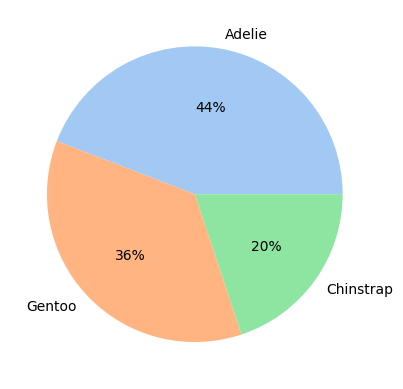

In [34]:
species_counts = cleaned_data.species.value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%.0f%%')
plt.show()

样本中`Adelie`这个企鹅种类占比最大；`Gentoo`种类占比次之；`Chinstrap`种类占比最小，仅占1/5左右。

#### 企鹅所在岛屿比例

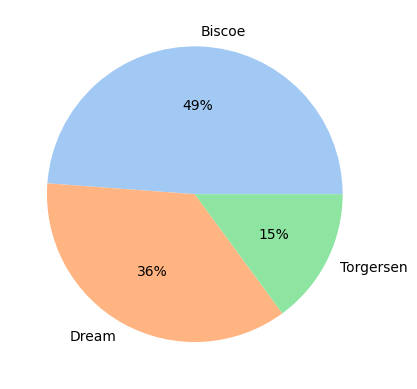

In [36]:
island_counts = cleaned_data.island.value_counts()
plt.pie(island_counts, labels=island_counts.index, autopct='%.0f%%')
plt.show()

样本中一半左右的企鹅都来自`Biscoe`岛屿，占比最大；来自`Dream`岛屿的企鹅占比次之；来自`Torgersen`岛屿的企鹅占比最小，仅占15%

#### 企鹅性别比例

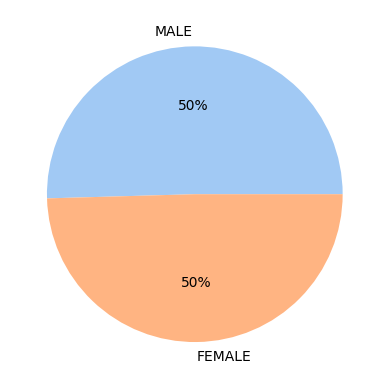

In [37]:
sex_counts = cleaned_data.sex.value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%.0f%%')
plt.show()

样本中企鹅性别占比基本持平，符合随机抽样。

#### 不同岛上的企鹅种类数量

<Axes: xlabel='island', ylabel='count'>

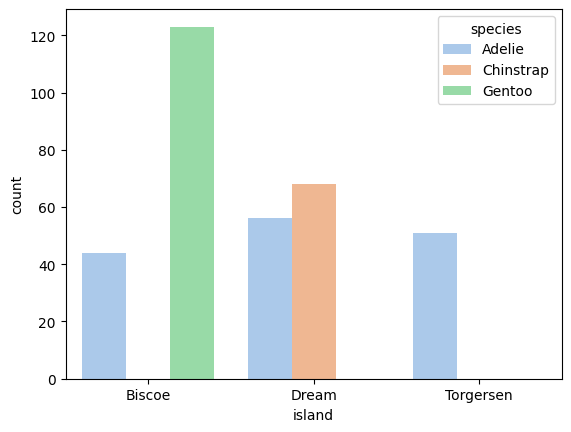

In [49]:
sns.countplot(cleaned_data, x='island', hue='species')

可以看出，`Adelie`种类企鹅样本在`Biscoe`、`Dream`、`Torgersen`三个岛上均有分布，而`Gentoo`企鹅样本只存在于`Biscoe`岛上，`Chinstrap`企鹅样本只存在于`Dream`岛上。

#### 不同岛上的且性别数量

<Axes: xlabel='island', ylabel='count'>

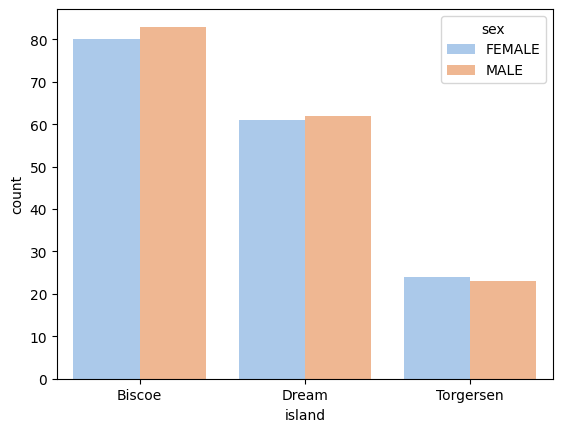

In [50]:
sns.countplot(cleaned_data, x='island', hue='sex')

可以看出不同岛上企鹅样本性别相对比较平均

#### 不同种类的企鹅性别数量

<Axes: xlabel='species', ylabel='count'>

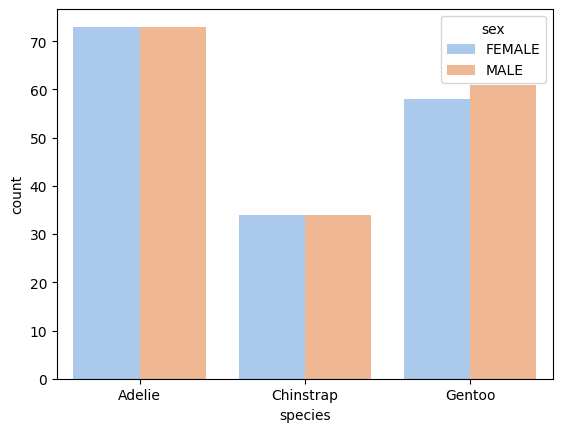

In [51]:
sns.countplot(cleaned_data, x='species', hue='sex')

可以看出不同种类企鹅样本性别相对比较平均

#### 查看数值变量之间的相关关系

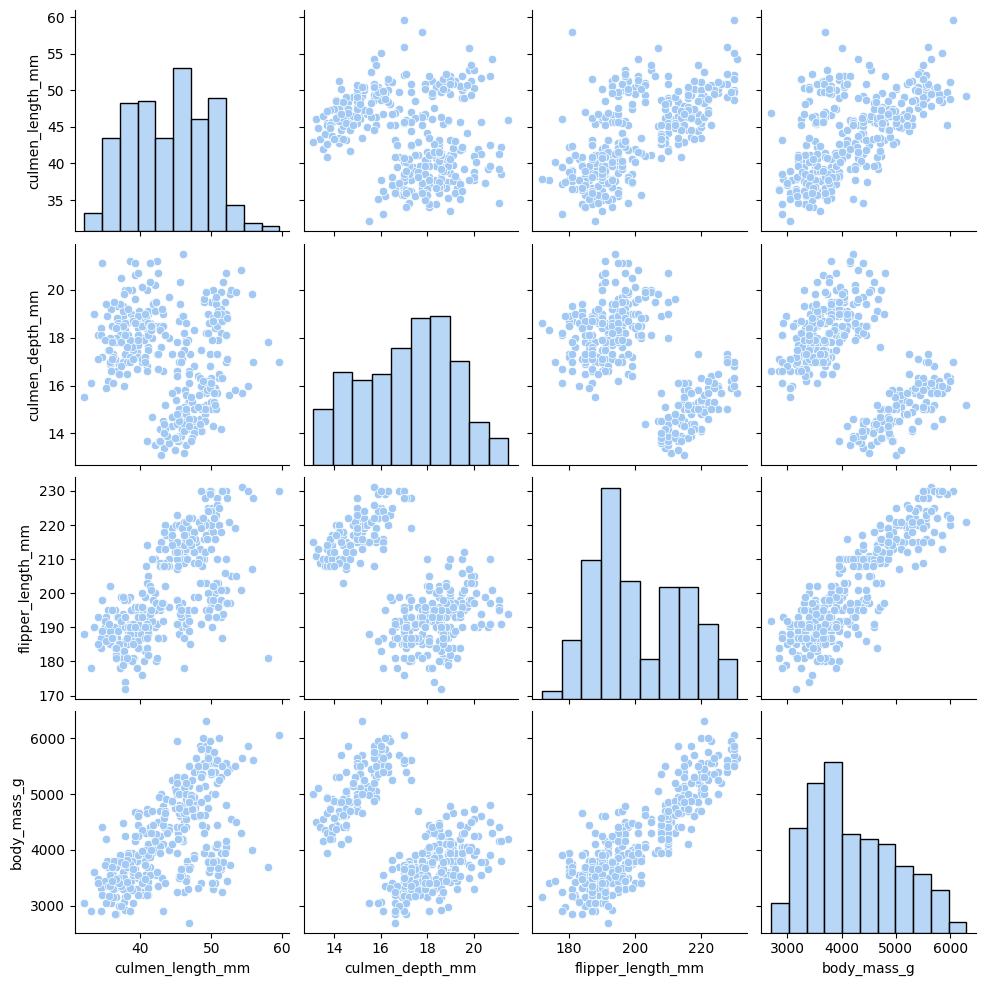

In [52]:
sns.pairplot(cleaned_data)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据；另一方方面也说明样本数不够大。

另外可以在散点图中，可以看出明显的多个集群，可能与某些因素有关，比如企鹅的种类、性别等。因此可以对此进行进一步的分类

#### 通过种类查看数值变量之间的相关关系&探索企鹅种类与数值变量的关系

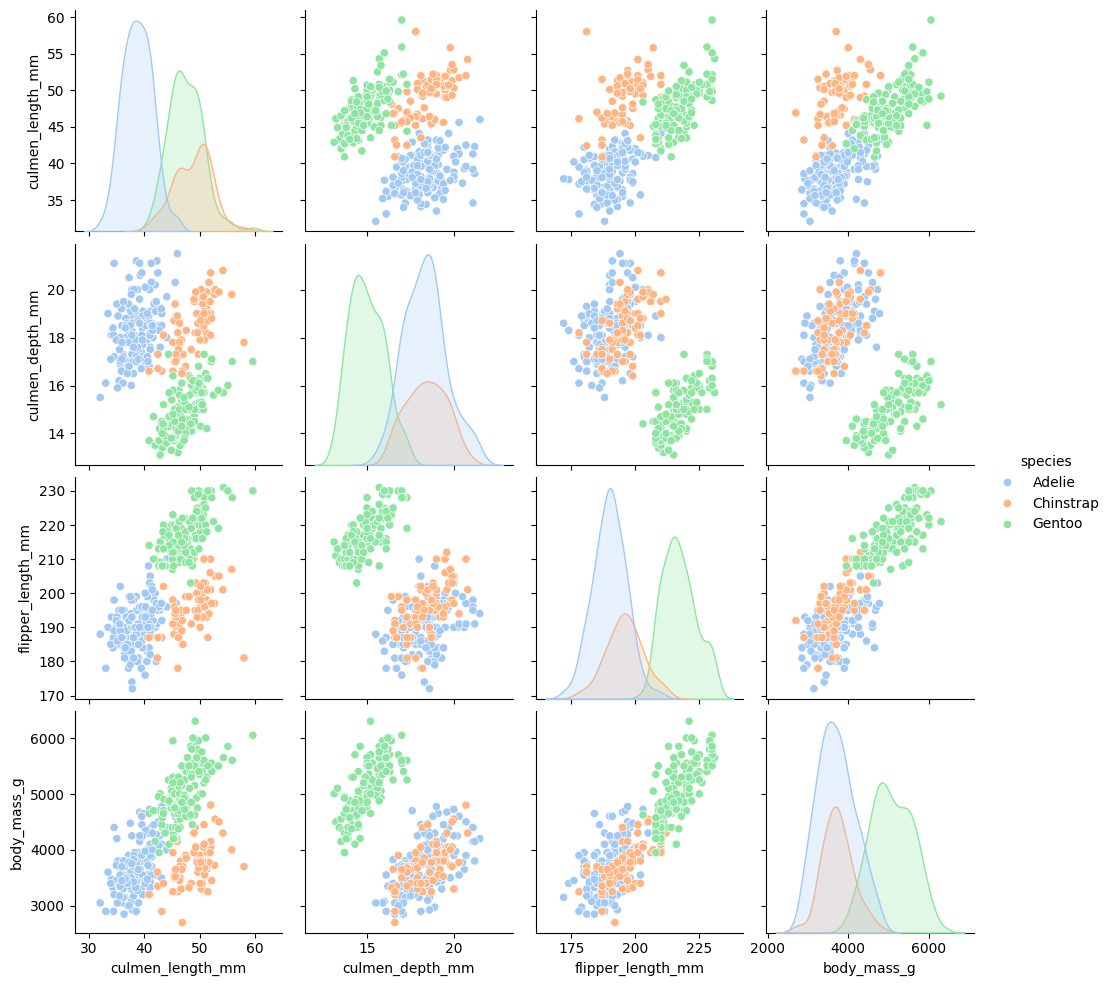

In [39]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

1. 根据种类分组之后，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布更接近正态分布。

2. 对比不同种类企鹅身体属性的密度图，可以得到以下关于样本的发现：

- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。

- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。

- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度最长。

- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类企鹅的身体属性数值是否存在统计学显著性差异，仍然需要进行假设检验后才能得到结论。

3. 观察不同种类企鹅嘴峰长度和嘴峰深度的散点图，可以发现：Gentoo企鹅的嘴峰特征是浅长，Adelie企鹅的嘴峰特征是深短，Chinstrap企鹅的嘴峰特征是深长。

4. 散点图中的多个集群大概率与种类相关，或者说同一种类的企鹅样本数据，在散点图中基本都聚在一起，说明同一种类的企鹅，在嘴峰长度、嘴峰深度、鳍长度、体重上存在相似性。

各个集群的数值变量之间，存在比较明显的正相关关系，因此在图中加入线性回归线，更清晰地展现相关关系：

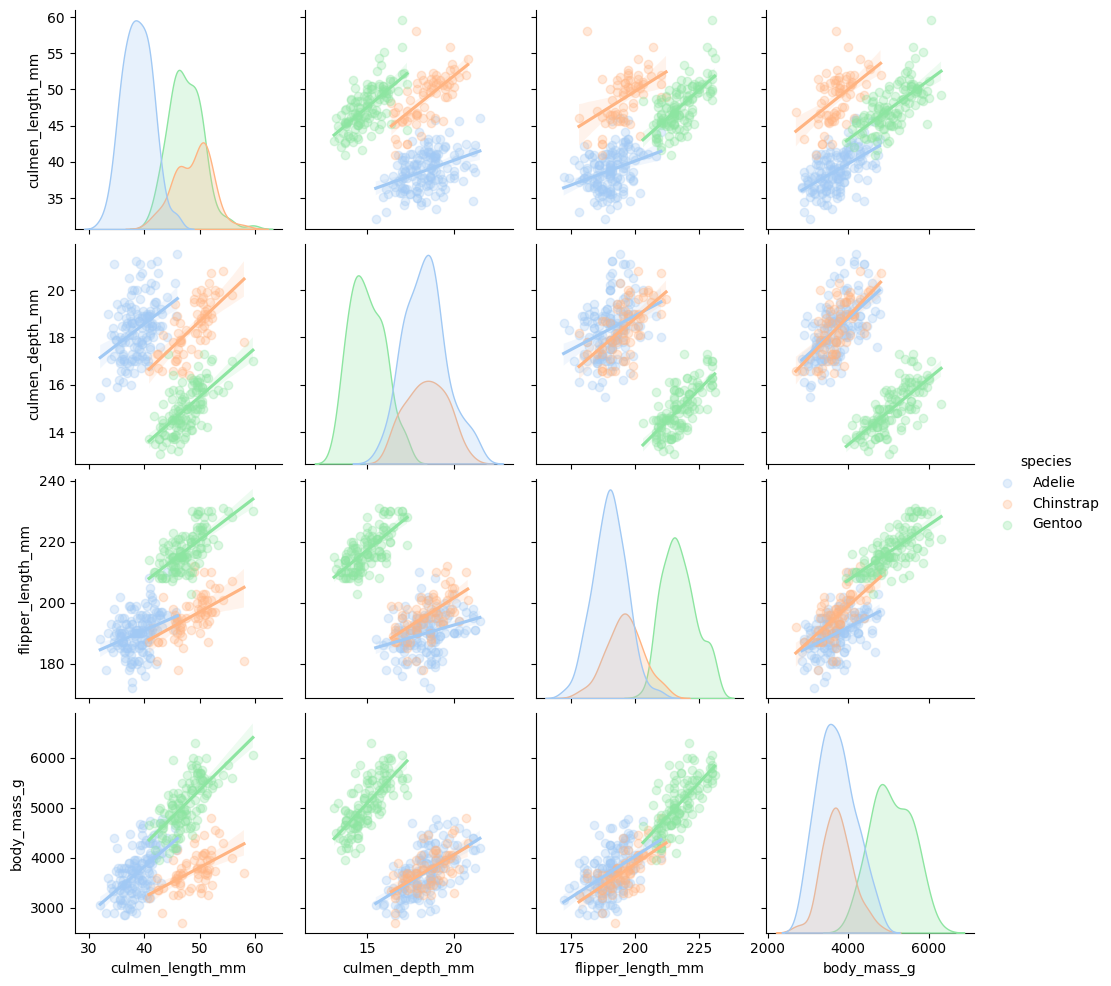

In [53]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重；嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

这些发现有利于我们根据身体数据推测企鹅种类，也可以根据企鹅种类推测身体数据。

#### 探索企鹅性别与身体属性的关系：

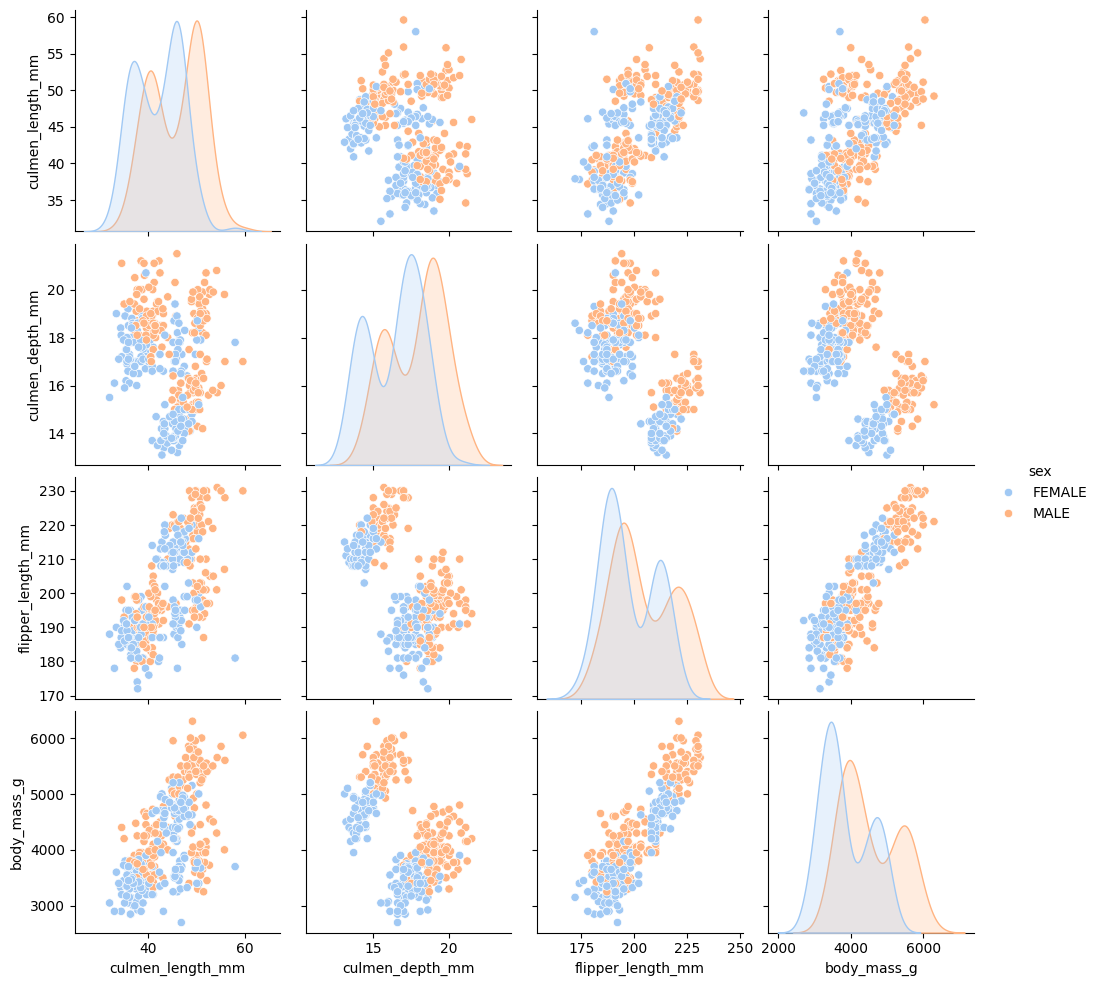

In [41]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项身体属性数值方面大于雌性企鹅。

#### 探索企鹅所在岛屿与身体属性的关系：

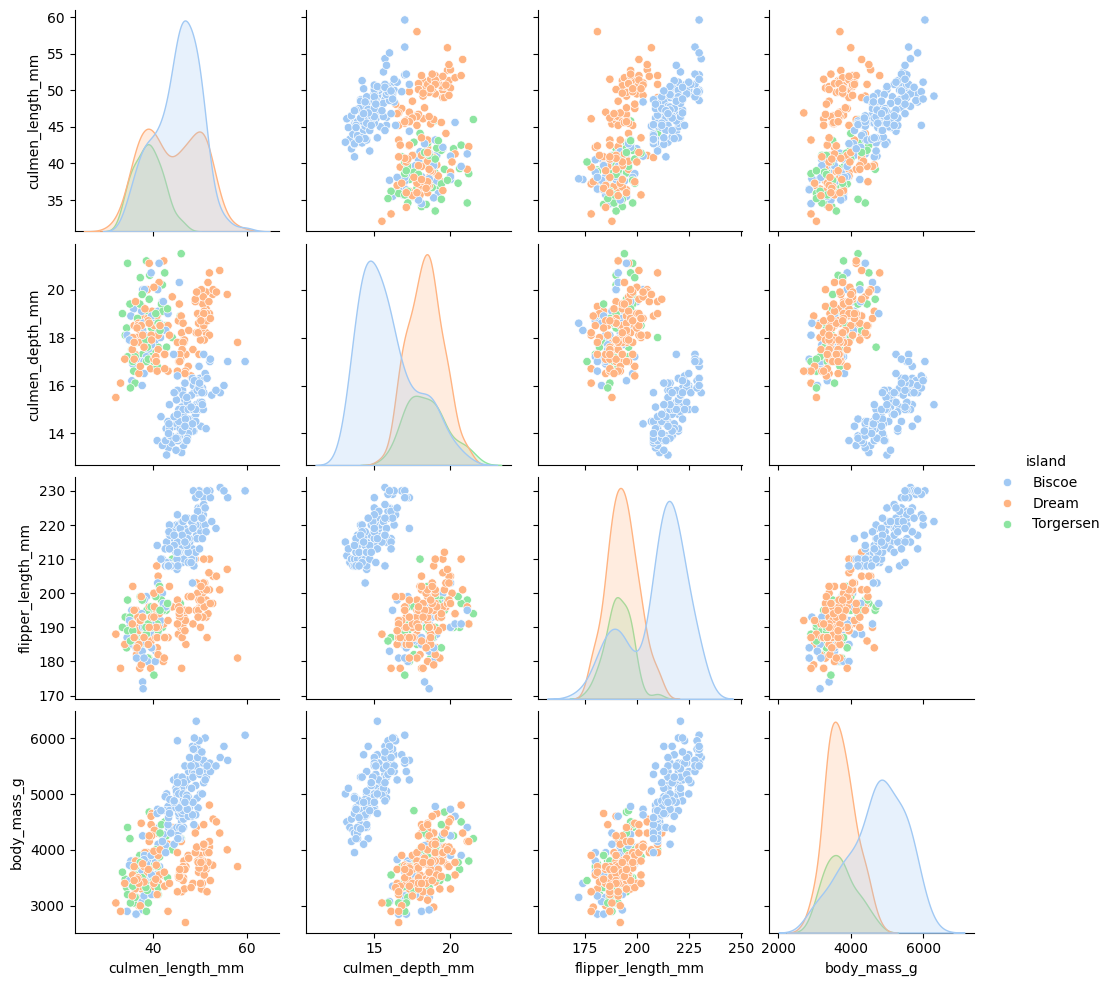

In [40]:
sns.pairplot(cleaned_data, hue='island')
plt.show()

企鹅所在岛屿与身体属性无明显相关关系、趋势或影响